In [64]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [65]:
# Importing the dataset
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/16/2016,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,8/17/2016,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,8/18/2016,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,8/19/2016,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,8/22/2016,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [66]:
# Dropping unnecessary columns and renaming to standard conventions
df.drop(["Open","High","Low","Adj Close","Volume"], axis=1, inplace=True)
df = df.rename(columns={'Date': 'date','Close':'close'})
df['date'] = pd.to_datetime(df.date)
closedf = df[['date','close']]
closedf.head()

,date,close
0,2016-08-16,44.722000
1,2016-08-17,44.647999
2,2016-08-18,44.702000
3,2016-08-19,45.000000
4,2016-08-22,44.585999


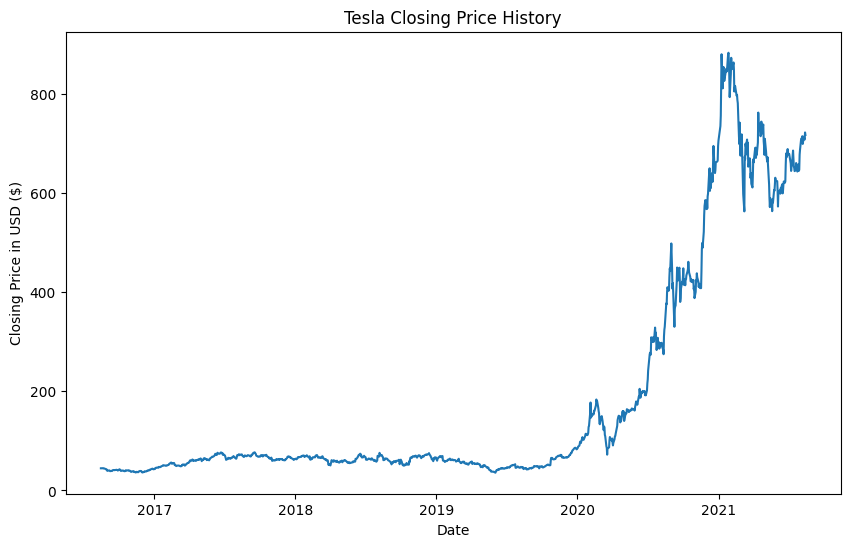

In [83]:
# Visualising the Tesla closing price history
fig = plt.figure(figsize = (10,6))
plt.plot(closedf['date'], closedf['close'])
plt.xlabel('Date')
plt.ylabel('Closing Price in USD ($)')
plt.title('Tesla Closing Price History')
plt.show()

In [ ]:
# Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf['close']).reshape(-1,1))

In [ ]:
# Splitting the data into training and testing sets, leaving the last 30% of the data for testing
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (880, 1)
test_data:  (378, 1)


In [ ]:
# Arranging data to include the next 14 days closing price to predict the 15th day closing price
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (864, 15)
y_train:  (864,)
X_test:  (362, 15)
y_test (362,)


In [ ]:
# Making an XGBoost regression model
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluating the model
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.3950602313573974
Root Mean squared Error - RMSE : 0.4724686100822084


Using 2 weeks of closing price history to predict the next closing price through XGBoost is quite effective, achieving a MAE of only 0.395, and an RMSE of 0.472.